In [ ]:
import pandas as pd

# Chemin vers le fichier CSV de planification de transport
csv_file_path = '/content/dataset_planification_transport_LK.csv'

# Charger le fichier CSV dans un DataFrame pandas
df_planification = pd.read_csv(csv_file_path)

# Afficher les 5 premières lignes du DataFrame pour comprendre sa structure
display(df_planification.head())

,trajet_id,ville_depart,ville_arrivee,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,type_bus,jour_semaine,periode_depart,condition_route,carburant_litre,satisfaction_client
0,1,Tsévié,Tsévié,56.0,7.2,163.0,8847.0,52.0,50.0,Climatisé,Dimanche,Après-midi,Bonne,43.4,3
1,2,Sokodé,Tsévié,NaN,2.9,124.0,9401.0,39.0,NaN,Standard,Dimanche,NaN,Moyenne,73.7,4
2,3,Dapaong,Sokodé,496.0,1.6,163.0,9228.0,56.0,NaN,Standard,Dimanche,Soir,Bonne,26.5,2
3,4,Sokodé,Lomé,463.0,8.8,88.0,3618.0,NaN,NaN,VIP,Jeudi,Matin,Mauvaise,42.5,4
4,5,Kara,Dapaong,130.0,3.4,32.0,7518.0,67.0,50.0,VIP,Dimanche,Après-midi,Mauvaise,21.5,1


In [ ]:
print("--- Informations générales sur le DataFrame ---")
df_planification.info()

print("\n--- Nombre de valeurs manquantes par colonne ---")
print(df_planification.isnull().sum())

print("\n--- Statistiques descriptives des colonnes numériques ---")
display(df_planification.describe())

print("\n--- Colonnes catégorielles ---")
categorical_cols = df_planification.select_dtypes(include='object').columns
if len(categorical_cols) > 0:
    print(list(categorical_cols))
else:
    print("Aucune colonne catégorielle (type 'object') trouvée.")

--- Informations générales sur le DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trajet_id            2000 non-null   int64  
 1   ville_depart         1844 non-null   object 
 2   ville_arrivee        1840 non-null   object 
 3   distance_km          1840 non-null   float64
 4   duree_prevue_h       1840 non-null   float64
 5   retard_min           1840 non-null   float64
 6   prix_billet          1840 non-null   float64
 7   nb_passagers         1836 non-null   float64
 8   capacite_bus         1840 non-null   float64
 9   type_bus             1840 non-null   object 
 10  jour_semaine         1840 non-null   object 
 11  periode_depart       1840 non-null   object 
 12  condition_route      1840 non-null   object 
 13  carburant_litre      1840 non-null   float64
 14  satisfaction_client  2000 non-null   int

,trajet_id,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,carburant_litre,satisfaction_client
count,2000.000000,1840.000000,1840.000000,1840.000000,1840.000000,1836.000000,1840.000000,1840.000000,2000.00000
mean,1000.500000,352.983696,6.775326,91.687500,6726.460326,37.994009,50.315217,47.511196,2.99750
std,577.494589,173.609929,2.975420,51.889587,3071.395956,19.120825,13.968371,18.564397,1.39695
min,1.000000,50.000000,1.500000,0.000000,1528.000000,5.000000,30.000000,15.000000,1.00000
25%,500.750000,203.000000,4.200000,48.000000,4008.000000,21.000000,40.000000,31.575000,2.00000
50%,1000.500000,355.000000,6.900000,93.000000,6599.000000,39.000000,50.000000,47.350000,3.00000
75%,1500.250000,503.000000,9.300000,137.000000,9527.000000,54.000000,60.000000,63.500000,4.00000
max,2000.000000,649.000000,12.000000,179.000000,11997.000000,79.000000,70.000000,80.000000,5.00000



--- Colonnes catégorielles ---
['ville_depart', 'ville_arrivee', 'type_bus', 'jour_semaine', 'periode_depart', 'condition_route']


In [ ]:
print("Taille du DataFrame avant suppression des lignes avec des valeurs manquantes:", df_planification.shape)

df_planification_cleaned = df_planification.dropna()

print("Taille du DataFrame après suppression des lignes avec des valeurs manquantes:", df_planification_cleaned.shape)
print("\nVérification des valeurs manquantes après nettoyage:")
print(df_planification_cleaned.isnull().sum())

Taille du DataFrame avant suppression des lignes avec des valeurs manquantes: (2000, 15)
Taille du DataFrame après suppression des lignes avec des valeurs manquantes: (664, 15)

Vérification des valeurs manquantes après nettoyage:
trajet_id              0
ville_depart           0
ville_arrivee          0
distance_km            0
duree_prevue_h         0
retard_min             0
prix_billet            0
nb_passagers           0
capacite_bus           0
type_bus               0
jour_semaine           0
periode_depart         0
condition_route        0
carburant_litre        0
satisfaction_client    0
dtype: int64


In [ ]:
y = df_planification_cleaned['satisfaction_client']
X = df_planification_cleaned.drop(columns=['trajet_id', 'satisfaction_client'])

print("Variable cible (y) - 5 premières lignes:")
print(y.head())
print("\nMatrice des caractéristiques (X) - 5 premières lignes:")
display(X.head())

Variable cible (y) - 5 premières lignes:
0    3
4    1
5    1
6    5
9    1
Name: satisfaction_client, dtype: int64

Matrice des caractéristiques (X) - 5 premières lignes:


,ville_depart,ville_arrivee,distance_km,duree_prevue_h,retard_min,prix_billet,nb_passagers,capacite_bus,type_bus,jour_semaine,periode_depart,condition_route,carburant_litre
0,Tsévié,Tsévié,56.0,7.2,163.0,8847.0,52.0,50.0,Climatisé,Dimanche,Après-midi,Bonne,43.4
4,Kara,Dapaong,130.0,3.4,32.0,7518.0,67.0,50.0,VIP,Dimanche,Après-midi,Mauvaise,21.5
5,Atakpamé,Dapaong,643.0,7.7,172.0,3194.0,26.0,30.0,Standard,Samedi,Soir,Bonne,46.1
6,Sokodé,Atakpamé,491.0,6.4,143.0,4272.0,43.0,40.0,Standard,Samedi,Soir,Bonne,63.0
9,Kara,Atakpamé,345.0,7.0,167.0,8811.0,29.0,30.0,Standard,Mercredi,Soir,Bonne,32.4


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (531, 13)
Shape of X_test: (133, 13)
Shape of y_train: (531,)
Shape of y_test: (133,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Required libraries imported successfully.


In [ ]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['distance_km', 'duree_prevue_h', 'retard_min', 'prix_billet', 'nb_passagers', 'capacite_bus', 'carburant_litre']
Categorical columns: ['ville_depart', 'ville_arrivee', 'type_bus', 'jour_semaine', 'periode_depart', 'condition_route']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

ColumnTransformer 'preprocessor' created successfully.


In [ ]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42, solver='liblinear'),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

for model_name, model_instance in models.items():
    print(f"- {model_name}: {type(model_instance).__name__}")

Models to be tested created successfully:
- LogisticRegression: LogisticRegression
- RandomForestClassifier: RandomForestClassifier
- SVC: SVC


In [ ]:
pipelines = {}
for model_name, model_instance in models.items():
    pipelines[model_name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_instance)
    ])

print("Pipelines created successfully:")
for pipeline_name, pipeline_instance in pipelines.items():
    print(f"- {pipeline_name}: {pipeline_instance.steps[1][1].__class__.__name__} classifier inside pipeline.")

Pipelines created successfully:
- LogisticRegression: LogisticRegression classifier inside pipeline.
- RandomForestClassifier: RandomForestClassifier classifier inside pipeline.
- SVC: SVC classifier inside pipeline.


In [ ]:
param_grid = {
    'LogisticRegression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    'RandomForestClassifier': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

print("Hyperparameter grid 'param_grid' created successfully.")


Hyperparameter grid 'param_grid' created successfully.


In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearchCV imported successfully.


In [ ]:
best_models = {}

for model_name, pipeline in pipelines.items():
    print(f"\n----- Running GridSearchCV for {model_name} -----")

    param_grid_model = param_grid[model_name]

    grid_search = GridSearchCV(pipeline, param_grid_model, cv=5, verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }

    print(f"Best score for {model_name}: {grid_search.best_score_:.4f}")
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")



----- Running GridSearchCV for LogisticRegression -----
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score for LogisticRegression: 0.2373
Best parameters for LogisticRegression: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

----- Running GridSearchCV for RandomForestClassifier -----
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score for RandomForestClassifier: 0.2035
Best parameters for RandomForestClassifier: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}

----- Running GridSearchCV for SVC -----
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best score for SVC: 0.2373
Best parameters for SVC: {'classifier__C': 0.1, 'classifier__kernel': 'rbf'}

GridSearchCV completed for all models. Best models and parameters stored.


In [ ]:
best_model_name = None
best_score_overall = -1

for model_name, metrics in best_models.items():
    if metrics['best_score'] > best_score_overall:
        best_score_overall = metrics['best_score']
        best_model_name = model_name

print(f"The best model overall based on GridSearchCV is: {best_model_name} with a score of {best_score_overall:.4f}")

The best model overall based on GridSearchCV is: LogisticRegression with a score of 0.2373


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

best_estimator = best_models[best_model_name]['best_estimator']
y_pred = best_estimator.predict(X_test)

print(f"Papport de classification pour {best_model_name} ---")
print(classification_report(y_test, y_pred))

print(f"Matrix de confusion pour {best_model_name} ---")
print(confusion_matrix(y_test, y_pred))


--- Classification Report for LogisticRegression ---
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        28
           3       0.23      1.00      0.38        31
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        21

    accuracy                           0.23       133
   macro avg       0.05      0.20      0.08       133
weighted avg       0.05      0.23      0.09       133


--- Confusion Matrix for LogisticRegression ---
[[ 0  0 30  0  0]
 [ 0  0 28  0  0]
 [ 0  0 31  0  0]
 [ 0  0 23  0  0]
 [ 0  0 21  0  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
param_grid = {
    'LogisticRegression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear'],
        'classifier__class_weight': [None, 'balanced']
    },
    'RandomForestClassifier': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__class_weight': [None, 'balanced']
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__class_weight': [None, 'balanced']
    }
}

Hyperparameter grid 'param_grid' updated successfully with class_weight options.


In [ ]:
best_models = {}

for model_name, pipeline in pipelines.items():
    print(f"\n----- Running GridSearchCV for {model_name} with updated param_grid -----")

    param_grid_model = param_grid[model_name]

    grid_search = GridSearchCV(pipeline, param_grid_model, cv=5, verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }

    print(f"Best score for {model_name}: {grid_search.best_score_:.4f}")
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


----- Running GridSearchCV for LogisticRegression with updated param_grid -----
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score for LogisticRegression: 0.2373
Best parameters for LogisticRegression: {'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

----- Running GridSearchCV for RandomForestClassifier with updated param_grid -----
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best score for RandomForestClassifier: 0.2035
Best parameters for RandomForestClassifier: {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__n_estimators': 200}

----- Running GridSearchCV for SVC with updated param_grid -----
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score for SVC: 0.2373
Best parameters for SVC: {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__kernel': 'rbf'}

GridSearchCV completed for all models with updated par

In [ ]:
best_model_name = None
best_score_overall = -1

for model_name, metrics in best_models.items():
    if metrics['best_score'] > best_score_overall:
        best_score_overall = metrics['best_score']
        best_model_name = model_name

print(f"The best model overall based on GridSearchCV is: {best_model_name} with a score of {best_score_overall:.4f}")

The best model overall based on GridSearchCV is: LogisticRegression with a score of 0.2373


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

best_estimator = best_models[best_model_name]['best_estimator']
y_pred = best_estimator.predict(X_test)

print(f"Rapport de Classification pour {best_model_name} ---")
print(classification_report(y_test, y_pred))

print(f"Matrix de classification pour {best_model_name} ---")
print(confusion_matrix(y_test, y_pred))


--- Classification Report for LogisticRegression ---
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        28
           3       0.23      1.00      0.38        31
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        21

    accuracy                           0.23       133
   macro avg       0.05      0.20      0.08       133
weighted avg       0.05      0.23      0.09       133


--- Confusion Matrix for LogisticRegression ---
[[ 0  0 30  0  0]
 [ 0  0 28  0  0]
 [ 0  0 31  0  0]
 [ 0  0 23  0  0]
 [ 0  0 21  0  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Distribution de la variable cible (satisfaction_client) dans l\'ensemble d\'entraînement')
plt.xlabel('Niveau de satisfaction client')
plt.ylabel('Nombre d\''observations)
plt.show()

print("Distribution numérique de la variable cible dans l'ensemble d'entraînement:")
print(y_train.value_counts(normalize=True))


SyntaxError: unterminated string literal (detected at line 8) (ipython-input-904664747.py, line 8)

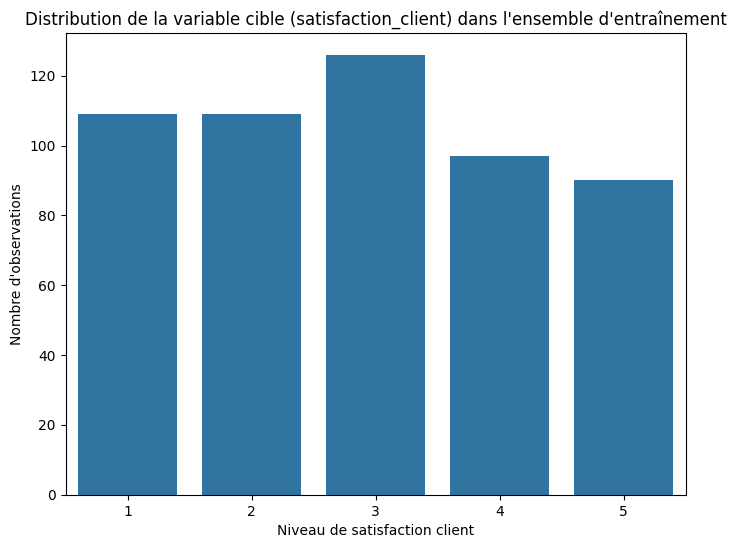

Distribution numérique de la variable cible dans l'ensemble d'entraînement:
satisfaction_client
3    0.237288
2    0.205273
1    0.205273
4    0.182674
5    0.169492
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Distribution de la variable cible (satisfaction_client) dans l\'ensemble d\'entraînement')
plt.xlabel('Niveau de satisfaction client')
plt.ylabel("Nombre d'observations")
plt.show()

print("Distribution numérique de la variable cible dans l'ensemble d'entraînement:")
print(y_train.value_counts(normalize=True))

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribution de la variable cible après SMOTE dans l'ensemble d'entraînement:")
print(y_train_resampled.value_counts())

ValueError: could not convert string to float: 'Dapaong'

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipelines = {}
for model_name, model_instance in models.items():

    pipelines[model_name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model_instance)
    ])


for pipeline_name, pipeline_instance in pipelines.items():
    print(f"- {pipeline_name}: {pipeline_instance.steps[1][1].__class__.__name__} and {pipeline_instance.steps[2][1].__class__.__name__} classifier inside pipeline.")

Pipelines created successfully with SMOTE step:
- LogisticRegression: SMOTE and LogisticRegression classifier inside pipeline.
- RandomForestClassifier: SMOTE and RandomForestClassifier classifier inside pipeline.
- SVC: SMOTE and SVC classifier inside pipeline.


In [ ]:
best_models = {}

for model_name, pipeline in pipelines.items():
    print(f"Modèle tourné : {model_name}")

    param_grid_model = param_grid[model_name]

    grid_search = GridSearchCV(pipeline, param_grid_model, cv=5, verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }


----- Running GridSearchCV for LogisticRegression with SMOTE in pipeline -----
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score for LogisticRegression: 0.2053
Best parameters for LogisticRegression: {'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

----- Running GridSearchCV for RandomForestClassifier with SMOTE in pipeline -----
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best score for RandomForestClassifier: 0.1977
Best parameters for RandomForestClassifier: {'classifier__class_weight': None, 'classifier__max_depth': 20, 'classifier__n_estimators': 200}

----- Running GridSearchCV for SVC with SMOTE in pipeline -----
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score for SVC: 0.2071
Best parameters for SVC: {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__kernel': 'linear'}

GridSearchCV completed for all models with SMOTE. Best

In [ ]:
best_model_name = None
best_score_overall = -1

for model_name, metrics in best_models.items():
    if metrics['best_score'] > best_score_overall:
        best_score_overall = metrics['best_score']
        best_model_name = model_name

print(f"Le meilleur modèle est le {best_model_name}")

The best model overall based on GridSearchCV (with SMOTE) is: SVC with a score of 0.2071


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

best_estimator = best_models[best_model_name]['best_estimator']
y_pred = best_estimator.predict(X_test)

print(f"Rapport de classification de {best_model_name}")
print(classification_report(y_test, y_pred))

print(f"Matrix de confusion de {best_model_name}")
print(confusion_matrix(y_test, y_pred))


--- Classification Report for SVC (with SMOTE) ---
              precision    recall  f1-score   support

           1       0.24      0.27      0.25        30
           2       0.38      0.29      0.33        28
           3       0.12      0.10      0.11        31
           4       0.12      0.09      0.10        23
           5       0.19      0.33      0.24        21

    accuracy                           0.21       133
   macro avg       0.21      0.21      0.21       133
weighted avg       0.21      0.21      0.21       133


--- Confusion Matrix for SVC (with SMOTE) ---
[[ 8  4  5  3 10]
 [ 5  8  6  4  5]
 [ 9  4  3  4 11]
 [ 6  4  7  2  4]
 [ 5  1  5  3  7]]
